<a href="https://colab.research.google.com/github/Kwasi-Scientist/KidneyDiseaseLogisticRegression/blob/main/HumanKidneyAtlas_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install anndata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 97.4 MB/s eta 0:00:00


In [13]:
#Imports all the necessary libraries for data manipulation, visualization, machine learning, and anndata specific functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
import anndata as ad

In [14]:
from google.colab import drive
drive.mount('/content/drive')  # Mounts Google drive where all data is stored

Mounted at /content/drive


In [15]:
# Sets the destination folder inside Google Drive.
dest_dir = "/content/drive/My Drive/Colab Notebooks/BIX/datasets/kidney"

In [16]:
# Creates the folder if it doesn't exist.
import os
os.makedirs(dest_dir, exist_ok=True)

In [17]:
# Downloads the file to the specified folder.
url = "https://datasets.cellxgene.cziscience.com/46274517-0999-4bd5-a59d-9e2f25aa5d52.h5ad"  # TODO: Add notes explaining the purpose and source of this URL.
                                                                                         #  Hint: Mention what kind of data this H5AD file contains.
outfile = os.path.join(dest_dir, "kidney_cellxgene.h5ad")  # TODO: Add notes explaining the construction of the output file path.
                                                         #  Hint: Elaborate on `os.path.join` for cross-platform compatibility.

In [18]:
# This line is commented out, but it would download the file if uncommented.
# !wget -O "$outfile" "$url"

In [19]:
"""Reads the kidney cell Atlas h5ad file.

This file contains single-cell RNA sequencing data for kidney cells.
Source: https://cellxgene.cziscience.com/collections/0f528c8a-a25c-4840-8fa3-d156fa11086f
"""
adata = ad.read_h5ad(dest_dir + "/kidney_cellxgene.h5ad")

In [20]:
# Displays the AnnData object to show its structure and contents.
adata

AnnData object with n_obs × n_vars = 225177 × 30635
    obs: 'orig.ident', 'nCount_RNA', 'SpecimenID', 'LibraryID', 'SampleID', 'Run', 'clusterNumber', 'subclass.l1', 'dataSource', 'diseasetype', 'Race', 'clusterClass', 'assay_ontology_term_id', 'sampletype', 'disease_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'Age_binned', 'cell_type_ontology_term_id', 'author_cell_type', 'diabetes_history', 'hypertension', 'eGFR', 'is_primary_data', 'disease_category', 'nFeature_RNA', 'percent.mt', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'index', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'default_embedding', 'organism', 'organism_ontology_term_id', 'sche

In [21]:
# Transposes the observation metadata (`obs`) DataFrame to view samples as rows and features as columns.
adata.obs.T

,S2008000605HRT_AAACCCAGTGCACATT-1,S2008000605HRT_AAACCCAGTGCCTACG-1,S2008000605HRT_AAAGAACGTAGAGACC-1,S2008000605HRT_AAAGAACGTCGGAACA-1,S2008000605HRT_AAAGAACGTTAACAGA-1,S2008000605HRT_AAAGGATAGTCATCCA-1,S2008000605HRT_AAAGGATGTTGTAGCT-1,S2008000605HRT_AAAGGATTCTGGACTA-1,S2008000605HRT_AAAGGGCAGCCTTTGA-1,S2008000605HRT_AAAGTCCTCCATCTCG-1,...,Sample1162EO2_TTTGACTGTCGCCACA-1,Sample1162EO2_TTTGATCAGTTGCCTA-1,Sample1162EO2_TTTGATCGTGAGTAGC-1,Sample1162EO2_TTTGATCGTGTGGTCC-1,Sample1162EO2_TTTGATCTCTCCTGCA-1,Sample1162EO2_TTTGGAGAGCAGGCAT-1,Sample1162EO2_TTTGGAGAGTCGCGAA-1,Sample1162EO2_TTTGGAGAGTGCTCGC-1,Sample1162EO2_TTTGGAGGTGATACTC-1,Sample1162EO2_TTTGGTTCAGTAGAAT-1
orig.ident,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,...,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2
nCount_RNA,10505.0,9698.0,1540.0,4958.0,6141.0,10770.0,5830.0,9450.0,3926.0,8273.0,...,16853.0,2020.0,2440.0,22151.0,23246.0,10499.0,3354.0,5811.0,15384.0,11192.0
SpecimenID,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,...,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2
LibraryID,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,...,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2
SampleID,163-3,163-3,163-3,163-3,163-3,163-3,163-3,163-3,163-3,163-3,...,108,108,108,108,108,108,108,108,108,108
Run,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,...,1162,1162,1162,1162,1162,1162,1162,1162,1162,1162
clusterNumber,2,2,11,2,2,2,2,2,11,2,...,4,3,8,2,7,2,8,3,7,4
subclass.l1,PC,PC,VSMC/MC/FIB,PC,PC,PC,PC,PC,VSMC/MC/FIB,PC,...,TAL,PT,EC,PC,IC,PC,EC,PT,IC,TAL
dataSource,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,...,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH
diseasetype,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,...,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference


In [22]:
# Checks the data types of the observation metadata terms (`adata.obs`) to understand how each feature is stored.
adata.obs.dtypes

,0
orig.ident,category
nCount_RNA,float64
SpecimenID,category
LibraryID,category
SampleID,category
Run,category
clusterNumber,category
subclass.l1,category
dataSource,category
diseasetype,category


In [23]:
# We would expect `obs` terms like `clusterNumber` to be `int32` rather than a string. Let's change that.
# ClusterNumber changed to numeric for convenience

In [24]:
# Changes the `clusterNumber` column in `adata.obs` to a numeric type (`float64`),
#  coercing non-numeric values to NaN and then casting to `float64`.
#adata.obs.clusterNumber = (
#    pd.to_numeric(adata.obs.clusterNumber, errors="coerce").astype("float64"))

In [25]:
# Checks the data types of `adata.obs` again after modification to confirm the change to `clusterNumber`.
adata.obs.dtypes

,0
orig.ident,category
nCount_RNA,float64
SpecimenID,category
LibraryID,category
SampleID,category
Run,category
clusterNumber,category
subclass.l1,category
dataSource,category
diseasetype,category


In [26]:
# Checks for the sum of null values in each column of `adata.obs` to identify missing data.
adata.obs.isnull().sum()

,0
orig.ident,0
nCount_RNA,0
SpecimenID,0
LibraryID,0
SampleID,0
Run,0
clusterNumber,0
subclass.l1,0
dataSource,0
diseasetype,0


In [27]:
# Examines the value counts for the 'disease' column in `adata.obs` to understand disease distribution.
adata.obs.disease.value_counts()

,count
disease,
chronic kidney disease,130630
acute kidney failure,51167
normal,43380


In [28]:
# Performs a sanity check to confirm that 'disease' and 'disease_category'
#  contain similar information by comparing their value counts.
adata.obs.disease_category.value_counts()

,count
disease_category,
CKD,130630
AKI,51167
Healthy_living_donor,36961
Healthy_stone_donor,6419


In [29]:
"""Defines the binary target variable 'unhealthy'.

This operation combines 'CKD' (Chronic Kidney Disease) and 'AKI' (Acute Kidney Injury)
into an 'unhealthy' category, which is represented as `True`. Conversely, the 'healthy'
categories are grouped into a 'not unhealthy' class, represented as `False`.
"""
adata.obs["unhealthy"] = (
    adata.obs.disease_category.isin(["AKI", "CKD"])
    .astype("bool")
)

In [30]:
# This line is commented out but would explicitly convert the 'unhealthy' column to a boolean type.
# adata.obs['unhealthy'] = adata.obs['unhealthy'].astype(bool)

In [31]:
# Displays the transposed observation metadata (`obs`) DataFrame again to include the newly added 'unhealthy' column.
adata.obs.T

,S2008000605HRT_AAACCCAGTGCACATT-1,S2008000605HRT_AAACCCAGTGCCTACG-1,S2008000605HRT_AAAGAACGTAGAGACC-1,S2008000605HRT_AAAGAACGTCGGAACA-1,S2008000605HRT_AAAGAACGTTAACAGA-1,S2008000605HRT_AAAGGATAGTCATCCA-1,S2008000605HRT_AAAGGATGTTGTAGCT-1,S2008000605HRT_AAAGGATTCTGGACTA-1,S2008000605HRT_AAAGGGCAGCCTTTGA-1,S2008000605HRT_AAAGTCCTCCATCTCG-1,...,Sample1162EO2_TTTGACTGTCGCCACA-1,Sample1162EO2_TTTGATCAGTTGCCTA-1,Sample1162EO2_TTTGATCGTGAGTAGC-1,Sample1162EO2_TTTGATCGTGTGGTCC-1,Sample1162EO2_TTTGATCTCTCCTGCA-1,Sample1162EO2_TTTGGAGAGCAGGCAT-1,Sample1162EO2_TTTGGAGAGTCGCGAA-1,Sample1162EO2_TTTGGAGAGTGCTCGC-1,Sample1162EO2_TTTGGAGGTGATACTC-1,Sample1162EO2_TTTGGTTCAGTAGAAT-1
orig.ident,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,...,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2
nCount_RNA,10505.0,9698.0,1540.0,4958.0,6141.0,10770.0,5830.0,9450.0,3926.0,8273.0,...,16853.0,2020.0,2440.0,22151.0,23246.0,10499.0,3354.0,5811.0,15384.0,11192.0
SpecimenID,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,...,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2
LibraryID,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,...,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2
SampleID,163-3,163-3,163-3,163-3,163-3,163-3,163-3,163-3,163-3,163-3,...,108,108,108,108,108,108,108,108,108,108
Run,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,...,1162,1162,1162,1162,1162,1162,1162,1162,1162,1162
clusterNumber,2,2,11,2,2,2,2,2,11,2,...,4,3,8,2,7,2,8,3,7,4
subclass.l1,PC,PC,VSMC/MC/FIB,PC,PC,PC,PC,PC,VSMC/MC/FIB,PC,...,TAL,PT,EC,PC,IC,PC,EC,PT,IC,TAL
dataSource,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,...,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH
diseasetype,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,...,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference


In [32]:
# Checks the value counts for the 'disease_category' column in `adata.obs`.
adata.obs.disease_category.value_counts()

,count
disease_category,
CKD,130630
AKI,51167
Healthy_living_donor,36961
Healthy_stone_donor,6419


In [33]:
# Checks the value counts for the newly created 'unhealthy' column in `adata.obs`.
adata.obs.unhealthy.value_counts()

,count
unhealthy,
True,181797
False,43380


Train Test Split

In [34]:
"""Splits the data into training and test sets.

First, an index is created for the `adata` object. Then, the target variable
`y` is set to the 'unhealthy' values. The data is split 80/20 into training
and test sets, stratified by `y` to maintain similar class proportions, and
shuffled with a `random_state` for reproducibility.
"""
# Sets an index variable (`idx`) to a range of integers with the length of `adata.obs`.
idx = np.arange(adata.n_obs)
# Sets `y`, the target variable, to the 'unhealthy' values from `adata.obs`.
y = adata.obs.unhealthy.values

# Splits the data into 80% training data and 20% test data.
#  `test_size=0.2` allocates 20% for testing. `stratify=y` ensures similar class
#  proportions in both sets. `random_state=42` provides reproducibility, and
#  `shuffle=True` shuffles the data before splitting.
train_idx, test_idx = train_test_split(
    idx,
    test_size=0.2,
    stratify=y,
    random_state=42,
    shuffle=True
)

# Assigns training and test data to copies of the original `adata` object based on the generated indices.
adata_train = adata[train_idx].copy()
adata_test = adata[test_idx].copy()

In [35]:
# Displays the training data AnnData object to inspect its dimensions and metadata.
adata_train

AnnData object with n_obs × n_vars = 180141 × 30635
    obs: 'orig.ident', 'nCount_RNA', 'SpecimenID', 'LibraryID', 'SampleID', 'Run', 'clusterNumber', 'subclass.l1', 'dataSource', 'diseasetype', 'Race', 'clusterClass', 'assay_ontology_term_id', 'sampletype', 'disease_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'Age_binned', 'cell_type_ontology_term_id', 'author_cell_type', 'diabetes_history', 'hypertension', 'eGFR', 'is_primary_data', 'disease_category', 'nFeature_RNA', 'percent.mt', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'unhealthy'
    var: 'index', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'default_embedding', 'organism', 'organism_ontology_te

In [36]:
# Displays the testing data AnnData object to inspect its dimensions and metadata.
adata_test

AnnData object with n_obs × n_vars = 45036 × 30635
    obs: 'orig.ident', 'nCount_RNA', 'SpecimenID', 'LibraryID', 'SampleID', 'Run', 'clusterNumber', 'subclass.l1', 'dataSource', 'diseasetype', 'Race', 'clusterClass', 'assay_ontology_term_id', 'sampletype', 'disease_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'Age_binned', 'cell_type_ontology_term_id', 'author_cell_type', 'diabetes_history', 'hypertension', 'eGFR', 'is_primary_data', 'disease_category', 'nFeature_RNA', 'percent.mt', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'unhealthy'
    var: 'index', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'default_embedding', 'organism', 'organism_ontology_ter

In [37]:
"""Further splits the training data into training and validation sets.

An index is created for the `adata_train` object. The target `y` is set
to the 'unhealthy' values from the training data. The `adata_train` data
is then split, with 33% allocated to the validation set, stratified by `y`,
and with a `random_state` of 11 for reproducibility.
"""
# Sets the index (`idx`) to a range with the length of the training data's observations.
idx = np.arange(adata_train.n_obs)

# Sets the target value (`y`) to the 'unhealthy' values from the training data.
y = adata_train.obs.unhealthy.values

# Splits the training data into the validation set.
#  `test_size=0.33` allocates 33% for validation. `stratify=y` maintains class
#  proportions. `random_state=11` ensures reproducibility.
train_idx, val_idx = train_test_split(
    idx,
    test_size=0.33,
    stratify=y,
    random_state=11
)

# Creates the validation dataset (`adata_val`) by applying the validation indices to the original `adata` object.
adata_val = adata[val_idx].copy()

In [38]:
# Defines training, validation, and test target values from the respective datasets.
y_train = adata_train.obs["unhealthy"].values

y_val = adata_val.obs["unhealthy"].values

y_test = adata_test.obs["unhealthy"].values  # TODO: Add notes explaining the purpose of `y_test` and how it will be used later.

# Deletes the 'unhealthy' column from the `obs` metadata of the train and validation datasets
#  to prevent data leakage during feature engineering.
del adata_train.obs['unhealthy']
del adata_val.obs['unhealthy']

Exploratory Data Analysis

In [39]:
# Displays the training data AnnData object to confirm the removal of the 'unhealthy' column.
adata_train

AnnData object with n_obs × n_vars = 180141 × 30635
    obs: 'orig.ident', 'nCount_RNA', 'SpecimenID', 'LibraryID', 'SampleID', 'Run', 'clusterNumber', 'subclass.l1', 'dataSource', 'diseasetype', 'Race', 'clusterClass', 'assay_ontology_term_id', 'sampletype', 'disease_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'Age_binned', 'cell_type_ontology_term_id', 'author_cell_type', 'diabetes_history', 'hypertension', 'eGFR', 'is_primary_data', 'disease_category', 'nFeature_RNA', 'percent.mt', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'index', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'default_embedding', 'organism', 'organism_ontology_term_id', 'sche

In [40]:
# Defines a list of categorical features to be handled separately in the analysis.
categoricals = ['Race', 'diseasetype', 'clusterClass', 'sampletype','suspension_type','tissue_type','author_cell_type', 'diabetes_history','hypertension','eGFR',
                'disease_category','cell_type','disease','sex','Age_binned']

In [41]:
# Checks the number of unique values for each categorical feature in the training data (`adata_train.obs`).
adata_train.obs[categoricals].nunique()

,0
Race,6
diseasetype,3
clusterClass,4
sampletype,5
suspension_type,1
tissue_type,1
author_cell_type,54
diabetes_history,3
hypertension,2
eGFR,13


### Feature Importance Analysis

In [42]:
"""Calculates the 'unhealthy' rate for specific demographic groups and compares it to the global 'unhealthy' rate.

This helps in assessing the predictive importance of the 'sex' feature.
A large delta (difference) suggests that the feature is influential.
"""
# Finds the 'unhealthy' rate specifically for female individuals in the training set.
female_unhealthy_rate = y_train[adata_train.obs.sex == 'female'].mean()

# Finds the 'unhealthy' rate specifically for male individuals in the training set.
male_unhealthy_rate = y_train[adata_train.obs.sex == 'male'].mean()

# Finds the global 'unhealthy' rate across the entire training set.
global_mean = y_train.mean()

# Displays the calculated 'unhealthy' rates for females, males, and the global average.
female_unhealthy_rate, male_unhealthy_rate, global_mean

(np.float64(0.719557278247037),
 np.float64(0.8935900962861073),
 np.float64(0.8073509084550435))

The delta between female unhealthy rate and the global unhealthy is large, so sex is significant



We chose to calulat the risk ratio instead of can contining with this analysis for each categorical

#  Risk Ratio

In [43]:
"""Explains the concept of risk ratio in the context of binary outcomes.

The risk ratio quantifies the likelihood of an event (e.g., being 'unhealthy')
in one group compared to its likelihood in a baseline group (often the global rate).
It is calculated as: `Risk Ratio = (Group Rate) / (Global Rate)`.

- If the risk ratio is close to 1, the group's rate is similar to the global rate.
- If the risk ratio is less than 1 (e.g., 0.5), the group is less likely (e.g., half as likely)
to experience the event compared to the global average.
- If the risk ratio is greater than 1, the group is more likely to experience the event.

This metric helps identify features where specific categories significantly deviate
from the overall probability, indicating their predictive power.
"""

"Explains the concept of risk ratio in the context of binary outcomes.\n\nThe risk ratio quantifies the likelihood of an event (e.g., being 'unhealthy')\nin one group compared to its likelihood in a baseline group (often the global rate).\nIt is calculated as: `Risk Ratio = (Group Rate) / (Global Rate)`.\n\n- If the risk ratio is close to 1, the group's rate is similar to the global rate.\n- If the risk ratio is less than 1 (e.g., 0.5), the group is less likely (e.g., half as likely)\nto experience the event compared to the global average.\n- If the risk ratio is greater than 1, the group is more likely to experience the event.\n\nThis metric helps identify features where specific categories significantly deviate\nfrom the overall probability, indicating their predictive power.\n"

In [44]:
"""Calculates the risk ratio for each category within the defined categorical features.

This process involves comparing the 'unhealthy' rate within each specific category
to the overall 'unhealthy' rate across the entire training dataset.
"""
# Calculates the global 'unhealthy' rate from the training target variable.
global_mean = y_train.mean()

# Creates a temporary DataFrame that contains the target variable and the training data categoricals.
#  A temporary DataFrame is initiated with the index of the training data's observations,
#  and its first column stores the target variable `y_train`.
temp_df = pd.DataFrame({'target_unhealthy': y_train}, index=adata_train.obs.index)
for col in categoricals:
    # For each category in the `categoricals` list, the corresponding column
    #  from `adata_train.obs` is added to the temporary DataFrame.
    temp_df[col] = adata_train.obs[col]

# Calculates the categorical mean and risk ratio for each categorical variable.
for col in categoricals:
  # Groups the temporary DataFrame by each category in the current column (`col`).
  #  For each group, the mean of the `target_unhealthy` values is computed.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])

  # Calculates the difference between the category's mean 'unhealthy' rate
  #  and the global 'unhealthy' rate, storing it in the 'delta' column.
  cat_mean["delta"] = cat_mean["mean"] - global_mean

  # Calculates the risk ratio by dividing the category's mean 'unhealthy' rate
  #  by the global 'unhealthy' rate.
  cat_mean["risk_ratio"] = cat_mean["mean"] / global_mean

  # Filters the results to create `final_risk_df`, including only categories
  #  where the risk ratio is greater than or equal to 1, indicating increased risk.
  final_risk_df = cat_mean[cat_mean["risk_ratio"] >=1]

  display(final_risk_df)
  # TODO: Add notes explaining how to interpret the `final_risk_df` for each categorical feature.
  #  Hint: Discuss what a risk ratio greater than 1 signifies for the 'unhealthy' outcome.

"""Based on the `final_risk_df` tables, several categorical features show a risk ratio >= 1.

These include 'Race', 'sampletype', 'author_cell_type', 'diabetes_history',
'hypertension', 'eGFR', 'cell_type', and 'sex'. These features are considered
significant because their presence in a specific category increases the likelihood
of the 'unhealthy' outcome compared to the global average.
"""

/tmp/ipython-input-855465989.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
Race,,,
Asian,1.000000,0.192649,1.238619
BlackorAfrican-American,0.985474,0.178124,1.220627
Unknown,1.000000,0.192649,1.238619
White-Other,1.000000,0.192649,1.238619


/tmp/ipython-input-855465989.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
diseasetype,,,
AKI,1.0,0.192649,1.238619
CKD,1.0,0.192649,1.238619


/tmp/ipython-input-855465989.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
clusterClass,,,
epithelial cells,0.819329,0.011978,1.014836
immune cells,0.835420,0.028070,1.034767


/tmp/ipython-input-855465989.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
sampletype,,,
AKI,1.0,0.192649,1.238619
DKD,1.0,0.192649,1.238619
HCKD,1.0,0.192649,1.238619


/tmp/ipython-input-855465989.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
suspension_type,,,
cell,0.807351,0.0,1.0


/tmp/ipython-input-855465989.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
tissue_type,,,
tissue,0.807351,0.0,1.0


/tmp/ipython-input-855465989.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
author_cell_type,,,
NKT,0.936489,0.129138,1.159953
DTL1,0.950800,0.143449,1.177678
M-TAL,0.919293,0.111942,1.138654
aPT,0.914085,0.106734,1.132202
T,0.820270,0.012919,1.016002
dPC,0.981259,0.173908,1.215405
PC,0.894541,0.087190,1.107995
CNT-IC-A,0.855697,0.048346,1.059882
CNT-PC,0.818182,0.010831,1.013415


/tmp/ipython-input-855465989.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
diabetes_history,,,
Don't know,1.0,0.192649,1.238619
Yes,1.0,0.192649,1.238619


/tmp/ipython-input-855465989.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
hypertension,,,
Yes,1.0,0.192649,1.238619


/tmp/ipython-input-855465989.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
eGFR,,,
20-29 ml/min/1.73m2,1.0,0.192649,1.238619
30-39 ml/min/1.73m2,1.0,0.192649,1.238619
40-49 ml/min/1.73m2,1.0,0.192649,1.238619
50-59 ml/min/1.73m2,1.0,0.192649,1.238619
60-69 ml/min/1.73m2,1.0,0.192649,1.238619
70-79 ml/min/1.73m2,1.0,0.192649,1.238619
80-89 ml/min/1.73m2,1.0,0.192649,1.238619
90-99 ml/min/1.73m2,1.0,0.192649,1.238619
100-109 ml/min/1.73m2,1.0,0.192649,1.238619


/tmp/ipython-input-855465989.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
disease_category,,,
AKI,1.0,0.192649,1.238619
CKD,1.0,0.192649,1.238619


/tmp/ipython-input-855465989.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
cell_type,,,
T cell,0.823668,0.016317,1.020211
B cell,0.880212,0.072861,1.090247
monocyte,0.870666,0.063315,1.078423
plasma cell,0.954762,0.147411,1.182586
mature NK T cell,0.936489,0.129138,1.159953
non-classical monocyte,0.875000,0.067649,1.083791
conventional dendritic cell,0.924466,0.117115,1.145061
"plasmacytoid dendritic cell, human",0.904290,0.096940,1.120071
epithelial cell of proximal tubule,0.815507,0.008156,1.010102


/tmp/ipython-input-855465989.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
disease,,,
acute kidney failure,1.0,0.192649,1.238619
chronic kidney disease,1.0,0.192649,1.238619


/tmp/ipython-input-855465989.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
sex,,,
male,0.89359,0.086239,1.106817


/tmp/ipython-input-855465989.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
Age_binned,,,
eighth decade human stage,0.912916,0.105565,1.130755
nineth decade human stage,1.000000,0.192649,1.238619
seventh decade human stage,0.992756,0.185405,1.229646


"Based on the `final_risk_df` tables, several categorical features show a risk ratio >= 1.\n\nThese include 'Race', 'sampletype', 'author_cell_type', 'diabetes_history', \n'hypertension', 'eGFR', 'cell_type', and 'sex'. These features are considered \nsignificant because their presence in a specific category increases the likelihood \nof the 'unhealthy' outcome compared to the global average.\n"

Mutual Information

In [45]:
"""Explains the concept of Mutual Information for feature selection.

Mutual Information quantifies the dependency between two variables.
Specifically, it measures how much information learning the value of one
variable provides about the other. Higher mutual information values indicate
a stronger dependency. In the context of feature selection, if a categorical
variable has high mutual information with the target variable, it suggests
that the categorical variable is useful for predicting the target. This metric
is typically used for discrete variables and does not apply directly to numerical features.
"""

'Explains the concept of Mutual Information for feature selection.\n\nMutual Information quantifies the dependency between two variables.\nSpecifically, it measures how much information learning the value of one\nvariable provides about the other. Higher mutual information values indicate\na stronger dependency. In the context of feature selection, if a categorical\nvariable has high mutual information with the target variable, it suggests\nthat the categorical variable is useful for predicting the target. This metric\nis typically used for discrete variables and does not apply directly to numerical features.\n'

In [46]:
# Creates a function `calculate_mi` to compute the mutual information score.
def calculate_mi(series):
  # Takes one parameter, `series`, which is a column of categorical values from the DataFrame.
  #  It returns the mutual information score between this series and the `y_train` target variable.
  return mutual_info_score(series,y_train)

# Applies the `calculate_mi` function to all categorical columns in `adata_train.obs`.
#  The results are stored in `df_mi`, sorted in descending order of MI score.
df_mi = adata_train.obs[categoricals].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name="MI")
display(df_mi)
"""Interprets the Mutual Information scores.

The `df_mi` table displays categorical features ranked by their mutual information scores.
Higher scores indicate a stronger dependency between the feature and the 'unhealthy' target variable.

- Features like 'disease_category', 'disease', and 'diseasetype' have very high MI scores
because they are directly used to derive the 'unhealthy' target. These should be removed
to avoid data leakage and overfitting in the model.
- 'eGFR' (estimated Glomerular Filtration Rate) is also highly predictive, which is expected
as it's a key marker for kidney function.
- Features with very low MI scores, such as 'tissue_type' and 'suspension_type',
provide little information about the target and can be considered for removal to simplify the model.
"""
# TODO: Explicitly list the final useful categoricals after considering MI scores and removal criteria.

,MI
sampletype,0.490041
disease_category,0.490041
diseasetype,0.490041
disease,0.490041
eGFR,0.490041
hypertension,0.273254
diabetes_history,0.192856
Age_binned,0.141553
Race,0.113884
author_cell_type,0.054966


"Interprets the Mutual Information scores.\n\nThe `df_mi` table displays categorical features ranked by their mutual information scores.\nHigher scores indicate a stronger dependency between the feature and the 'unhealthy' target variable.\n\n- Features like 'disease_category', 'disease', and 'diseasetype' have very high MI scores\nbecause they are directly used to derive the 'unhealthy' target. These should be removed\nto avoid data leakage and overfitting in the model.\n- 'eGFR' (estimated Glomerular Filtration Rate) is also highly predictive, which is expected\nas it's a key marker for kidney function.\n- Features with very low MI scores, such as 'tissue_type' and 'suspension_type',\nprovide little information about the target and can be considered for removal to simplify the model.\n"

In [47]:
# Removes `disease_category`, `disease`, `diseasetype`, and `eGFR` from `adata_train`, `adata_val`,
#  and `adata_test` to prevent data leakage and simplify the model.
adata_train.obs.drop(columns=["disease_category", "disease", "diseasetype",'eGFR'], inplace=True)
adata_val.obs.drop(columns=["disease_category", "disease", "diseasetype",'eGFR'], inplace=True)
adata_test.obs.drop(columns=["disease_category", "disease", "diseasetype",'eGFR'], inplace=True)

In [48]:
# Defines the final list of selected categorical features that will be used for modeling.
final_cats = ['Race', 'sampletype', 'author_cell_type', 'diabetes_history', 'hypertension', 'cell_type', 'sex', 'clusterClass', 'Age_binned']

Pearsons Correlation Coefficient

In [49]:
"""Explains Pearson's Correlation Coefficient for assessing linear relationships.

Pearson's correlation coefficient measures the linear relationship and dependency
between two variables, similar to mutual information but specifically for linearity.
Its value ranges between -1 and 1:

- **Positive correlation (close to 1)**: As one variable increases, the other tends to increase.
- **Negative correlation (close to -1)**: As one variable increases, the other tends to decrease.
- **Zero correlation (close to 0)**: There is no linear relationship or dependence between the variables.

This coefficient is typically used for numerical variables.
"""

"Explains Pearson's Correlation Coefficient for assessing linear relationships.\n\nPearson's correlation coefficient measures the linear relationship and dependency\nbetween two variables, similar to mutual information but specifically for linearity.\nIts value ranges between -1 and 1:\n\n- **Positive correlation (close to 1)**: As one variable increases, the other tends to increase.\n- **Negative correlation (close to -1)**: As one variable increases, the other tends to decrease.\n- **Zero correlation (close to 0)**: There is no linear relationship or dependence between the variables.\n\nThis coefficient is typically used for numerical variables.\n"

In [50]:
# Since this dataset primarily consists of categorical features, there are no numerical variables
#  suitable for calculating Pearson's correlation coefficient. Therefore, this step is skipped.
# TODO: Confirm if there are indeed no numerical features relevant for correlation with the target.
#  Hint: If there were numerical features, mention how one would use `.corrwith()` here.

Feature engineering

In [51]:
# Performs one-hot encoding of categorical variables using `DictVectorizer`.

# Creates `train_dict`, a dictionary of the categorical values from `final_cats`, oriented by records.
train_dict = adata_train.obs[final_cats].to_dict(orient='records')
# TODO: Add notes explaining what `train_dict` contains and why it's structured this way.
#  Hint: Describe how `to_dict(orient='records')` transforms the DataFrame rows into a list of dictionaries.

In [52]:
# Initializes `DictVectorizer` with `sparse=False` to get a dense matrix,
#  then fits it to the `train_dict` to learn the unique categorical values.
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [53]:
# Converts the `train_dict` into a one-hot encoded feature matrix (`X_train`) using the `transform` method.
X_train = dv.transform(train_dict)

In [54]:
# Retrieves the feature names generated by the `DictVectorizer` after one-hot encoding.
dv.get_feature_names_out(X_train)

array(['Age_binned=eighth decade human stage',
       'Age_binned=fifth decade human stage',
       'Age_binned=fourth decade human stage',
       'Age_binned=nineth decade human stage',
       'Age_binned=seventh decade human stage',
       'Age_binned=sixth decade human stage',
       'Age_binned=third decade human stage', 'Race=Asian',
       'Race=BlackorAfrican-American', 'Race=Other', 'Race=Unknown',
       'Race=White', 'Race=White-Other', 'author_cell_type=ATL',
       'author_cell_type=B', 'author_cell_type=C-TAL',
       'author_cell_type=CCD-PC', 'author_cell_type=CNT',
       'author_cell_type=CNT-IC-A', 'author_cell_type=CNT-PC',
       'author_cell_type=DCT1', 'author_cell_type=DCT2',
       'author_cell_type=DTL1', 'author_cell_type=EC-AEA',
       'author_cell_type=EC-AVR', 'author_cell_type=EC-GC',
       'author_cell_type=EC-LYM', 'author_cell_type=EC-PTC',
       'author_cell_type=FIB', 'author_cell_type=IC-A',
       'author_cell_type=IC-B', 'author_cell_type=IMCD',

Train the Logisitic Regression Model

In [55]:
"""Trains a Logistic Regression Model for binary classification.

Logistic regression is a linear model used for binary classification, which estimates
the probability of an instance belonging to a particular class (e.g., 'unhealthy').
The sigmoid function is applied to the linear output to constrain probabilities
between 0 and 1.
"""
# Initializes the Logistic Regression model.
model = LogisticRegression(solver="liblinear", random_state=42)  # TODO: Add notes explaining the chosen solver (`liblinear`) and the significance of `random_state`.
                                                                #  Hint: Mention `liblinear`'s suitability for small datasets and L1/L2 regularization.
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [56]:
# Applies the trained model to the validation set to generate predictions.

# Creates the validation set dictionary from `adata_val.obs` using `final_cats`.
val_dict = adata_val.obs[final_cats].to_dict(orient="records")
# TODO: Add notes explaining the structure and content of `val_dict`.
#  Hint: Compare it to `train_dict` and explain why it's created similarly.

In [57]:
# This section is commented out but demonstrates one-hot encoding for the validation data.
# `dv.fit(val_dict)` would fit the `DictVectorizer` again, which is generally incorrect for validation/test sets.
# TODO: Add notes explaining why `fit` should not be called again on the validation data with `DictVectorizer`.
#  Hint: Emphasize that the vectorizer should only be fitted on the training data to prevent data leakage.

In [58]:
# Transforms the validation dictionary (`val_dict`) into a one-hot encoded feature matrix (`X_val`)
#  using the previously fitted `DictVectorizer`.
X_val = dv.transform(val_dict)

In [59]:
# Predicts probabilities for the validation set using `X_val` and the trained model's `predict_proba()` function.
#  Slices the output to keep only the second column, which represents the probability of the positive class (True/unhealthy).
y_pred = model.predict_proba(X_val)[:,1]

In [60]:
# Displays the predicted probabilities for the validation set.
y_pred
# TODO: Add notes explaining what `y_pred` represents (probabilities of being 'unhealthy').
#  Hint: Discuss the range of these values and their meaning.

array([9.11081617e-04, 9.99812106e-01, 9.99986724e-01, ...,
       9.99575274e-01, 9.99970119e-01, 9.99999547e-01])

In [61]:
# Converts the predicted probabilities (`y_pred`) into binary class labels (True for 'unhealthy', False for 'healthy')
#  using a default threshold of 0.5.
unhealthy = y_pred >= 0.5

In [62]:
# Displays the hard predictions (binary labels) for the validation set, obtained by applying a 0.5 cutoff.
unhealthy

array([False,  True,  True, ...,  True,  True,  True])

In [63]:
# Determines the overall accuracy of the model on the validation set by comparing
#  the predicted binary labels (`unhealthy`) with the true labels (`y_val`).
(y_val == unhealthy).mean()

np.float64(1.0)

Model Interpretation

In [64]:
#the weights are are stored in `model.coef_[0]` and the intercept is stored in `model.intercept_[0]`
#get the weights

dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'Age_binned=eighth decade human stage': np.float64(0.5),
 'Age_binned=fifth decade human stage': np.float64(-1.04),
 'Age_binned=fourth decade human stage': np.float64(-0.6),
 'Age_binned=nineth decade human stage': np.float64(0.754),
 'Age_binned=seventh decade human stage': np.float64(1.115),
 'Age_binned=sixth decade human stage': np.float64(0.42),
 'Age_binned=third decade human stage': np.float64(0.19),
 'Race=Asian': np.float64(-0.046),
 'Race=BlackorAfrican-American': np.float64(1.288),
 'Race=Other': np.float64(-0.687),
 'Race=Unknown': np.float64(1.329),
 'Race=White': np.float64(-0.547),
 'Race=White-Other': np.float64(0.002),
 'author_cell_type=ATL': np.float64(0.205),
 'author_cell_type=B': np.float64(0.028),
 'author_cell_type=C-TAL': np.float64(-0.232),
 'author_cell_type=CCD-PC': np.float64(-0.082),
 'author_cell_type=CNT': np.float64(-0.002),
 'author_cell_type=CNT-IC-A': np.float64(0.239),
 'author_cell_type=CNT-PC': np.float64(-0.085),
 'author_cell_type=DCT1': np.fl

Using the Model

In [65]:
# Converts the test dataset (`adata_test`) into a dictionary format suitable for `DictVectorizer`.
test_dict = adata_test.obs[final_cats].to_dict(orient="records")

In [66]:
# Transforms the test dictionary (`test_dict`) into a one-hot encoded feature matrix (`X_test`)
#  using the *already fitted* `DictVectorizer`.
X_test = dv.transform(test_dict)

In [67]:
# Predicts probabilities for the test set using `X_test` and the trained model's `predict_proba()` function.
y_pred = model.predict_proba(X_test)[:,1]

In [68]:
# Displays the predicted probabilities for the test set.
y_pred
# TODO: Add notes explaining what these predictions represent for the test set and how they differ from `y_pred_val`.
#  Hint: Explain that these are the final model predictions on unseen data.

array([9.99870500e-01, 9.99888910e-01, 9.99999271e-01, ...,
       9.99999696e-01, 9.99999390e-01, 1.22789917e-04])

In [69]:
# Converts the predicted probabilities for the test set (`y_pred`) into binary class labels
#  using a threshold of 0.5.
unhealthy_test = y_pred >=0.5

In [70]:
# Calculates the accuracy of the model on the unseen test set by comparing
#  `unhealthy_test` with the true labels `y_test`.
(y_test == unhealthy_test).mean()

np.float64(1.0)

Evaluate Metrics for CLassification

In [71]:
# Determines various evaluation metrics crucial for classification model assessment.
# TODO: Add notes explaining each of these metrics (confusion table, ROC curve, AUC, precision) and their importance in classification.
#  Hint: Briefly define each metric and why it's used (e.g., accuracy vs. precision/recall for imbalanced datasets).

In [72]:
"""Evaluates model accuracy across various classification thresholds.

This loop calculates the `accuracy_score` for binary predictions made at different
probability thresholds, allowing for an assessment of how threshold selection affects performance.
"""
from sklearn.metrics import accuracy_score

# Recalculates `y_pred_val` specifically for the validation set (`X_val`)
#  to ensure consistency for accuracy calculations.
y_pred_val = model.predict_proba(X_val)[:,1]

# Creates an array of 11 equally spaced thresholds from 0.0 to 1.0.
thresholds = np.linspace(0,1,11)

for thresh in thresholds:
  # Converts probabilities to binary predictions based on the current threshold.
  unhealthy = y_pred_val >= thresh
  # Calculates the accuracy score for the current threshold.
  acc = accuracy_score(y_val, unhealthy)
  print('%0.2f %0.3f' % (thresh, acc))
# TODO: Add notes explaining the output format (Threshold, Accuracy) and interpreting the results.
#  Hint: Discuss why accuracy might vary and suggest why certain thresholds yield high accuracy.

0.00 0.899
0.10 1.000
0.20 1.000
0.30 1.000
0.40 1.000
0.50 1.000
0.60 1.000
0.70 1.000
0.80 1.000
0.90 1.000
1.00 0.101


COnfusion Table

In [73]:
"""Explains the Confusion Matrix (or Confusion Table).

The confusion matrix is a table that summarizes the performance of a classification
algorithm. It compares the model's predicted classifications against the true
labels (ground truth). It consists of four outcomes arranged in a quadrant:

- **True Positive (TP)**: Correctly predicted positive instances.
- **True Negative (TN)**: Correctly predicted negative instances.
- **False Positive (FP)**: Incorrectly predicted positive instances (Type I error).
- **False Negative (FN)**: Incorrectly predicted negative instances (Type II error).

By counting the occurrences of each outcome, we can build the confusion matrix
and derive other key evaluation metrics.
"""

"Explains the Confusion Matrix (or Confusion Table).\n\nThe confusion matrix is a table that summarizes the performance of a classification\nalgorithm. It compares the model's predicted classifications against the true\nlabels (ground truth). It consists of four outcomes arranged in a quadrant:\n\n- **True Positive (TP)**: Correctly predicted positive instances.\n- **True Negative (TN)**: Correctly predicted negative instances.\n- **False Positive (FP)**: Incorrectly predicted positive instances (Type I error).\n- **False Negative (FN)**: Incorrectly predicted negative instances (Type II error).\n\nBy counting the occurrences of each outcome, we can build the confusion matrix\nand derive other key evaluation metrics.\n"

In [74]:
"""Calculates the components of the confusion matrix for a specific threshold.

This function determines the counts of True Positives, True Negatives,
False Positives, and False Negatives based on the model's predictions and
the actual labels from the validation set.
"""
# Assigns a fixed threshold for converting probabilities to binary class labels.
thresh = 0.5

# Generates binary predictions based on the `y_pred_val` probabilities and the defined threshold.
pred_unhealthy = (y_pred_val >= thresh)
pred_not_unhealthy = (y_pred_val < thresh)

# Defines the actual binary labels from the validation set.
actual_unhealthy = (y_val == 1)
actual_not_unhealthy = (y_val == 0)

# Calculates the four components of the confusion matrix:
# TP: Instances where both predicted and actual values are positive.
true_postive = (pred_unhealthy & actual_unhealthy).sum()
# TN: Instances where both predicted and actual values are negative.
ture_negative = (pred_not_unhealthy & actual_not_unhealthy).sum()
# FN: Instances predicted as negative but are actually positive (Type II error).
false_negative = (pred_not_unhealthy & actual_unhealthy).sum()
# FP: Instances predicted as positive but are actually negative (Type I error).
false_positive = (pred_unhealthy & actual_not_unhealthy).sum()

In [75]:
"""Explains the Precision metric.

Precision measures the proportion of positive identifications that were actually correct.
It answers the question: 'Of all the instances the model predicted as positive, how many were truly positive?'

Formula: `Precision = TP / (TP + FP)`
"""
precision = true_postive / (true_postive + false_positive)
# TODO: Add notes explaining the calculated precision value.
#  Hint: Interpret what this precision score means in the context of the 'unhealthy' prediction.

In [76]:
"""Explains the Recall (or Sensitivity) metric.

Recall measures the proportion of actual positives that were correctly identified.
It answers the question: 'Of all the actual positive instances, how many did the model correctly identify?'

Formula: `Recall = TP / (TP + FN)`
"""
Recall = true_postive / (true_postive + false_negative)
# TODO: Add notes explaining the calculated recall value.
#  Hint: Interpret what this recall score means in the context of identifying 'unhealthy' individuals.

ROC and AUC

In [77]:
"""Explains Receiver Operating Characteristic (ROC) curves and Area Under the Curve (AUC).

ROC curves are graphical plots that illustrate the diagnostic ability of a binary
classifier system as its discrimination threshold is varied. It plots two metrics:

- **True Positive Rate (TPR) / Recall**: The fraction of correctly identified positive examples
  among all actual positive examples. Formula: `TPR = TP / (TP + FN)`.
- **False Positive Rate (FPR)**: The fraction of incorrectly identified positive examples
  among all actual negative examples. Formula: `FPR = FP / (FP + TN)`.

Both TPR and FPR are derived from the confusion matrix, calculated at various threshold settings.
AUC (Area Under the ROC Curve) measures the entire two-dimensional area underneath the
entire ROC curve. It provides an aggregate measure of performance across all possible
classification thresholds. An AUC of 1.0 represents a perfect classifier, while 0.5 represents
a classifier no better than random guessing.
"""

'Explains Receiver Operating Characteristic (ROC) curves and Area Under the Curve (AUC).\n\nROC curves are graphical plots that illustrate the diagnostic ability of a binary\nclassifier system as its discrimination threshold is varied. It plots two metrics:\n\n- **True Positive Rate (TPR) / Recall**: The fraction of correctly identified positive examples\n  among all actual positive examples. Formula: `TPR = TP / (TP + FN)`.\n- **False Positive Rate (FPR)**: The fraction of incorrectly identified positive examples\n  among all actual negative examples. Formula: `FPR = FP / (FP + TN)`.\n\nBoth TPR and FPR are derived from the confusion matrix, calculated at various threshold settings.\nAUC (Area Under the ROC Curve) measures the entire two-dimensional area underneath the\nentire ROC curve. It provides an aggregate measure of performance across all possible\nclassification thresholds. An AUC of 1.0 represents a perfect classifier, while 0.5 represents\na classifier no better than random 

In [78]:
# Calculates the False Positive Rate (FPR) for our model at the current threshold.
FPR = false_positive / (false_positive + ture_negative)

# Calculates the True Positive Rate (TPR) for our model at the current threshold.
TPR = true_postive / (true_postive + false_negative)
# TODO: Add notes explaining the calculated FPR and TPR values at the current threshold.
#  Hint: Briefly explain what these specific values indicate about Type I and Type II errors.

Evaluating model at multiple thresholds

In [79]:
"""Evaluates model performance across a range of classification thresholds.

This function iteratively calculates the True Positives (tp), False Positives (fp),
False Negatives (fn), and True Negatives (tn) for multiple thresholds. This data
is then compiled into a DataFrame (`df_scores`) for further analysis of TPR and FPR.
"""
# Creates an empty list to store the scores for each threshold.
scores = []

# Creates an array of 11 equally spaced threshold values from 0.0 to 1.0.
thresholds = np.linspace(0, 1, 11)

for t in thresholds:
  # Computes the confusion matrix components (tp, fp, fn, tn) for predictions at each threshold.
  tp = ((y_pred_val >= t) & (y_val == 1)).sum()
  fp = ((y_pred_val >= t) & (y_val == 0)).sum()
  fn = ((y_pred_val < t) & (y_val == 1)).sum()
  tn = ((y_pred_val < t) & (y_val == 0)).sum()
  # Appends the calculated components along with the threshold to the `scores` list.
  scores.append((t, tp, fp, fn, tn))

# Converts the `scores` list into a pandas DataFrame.
df_scores = pd.DataFrame(scores)
# Assigns appropriate column names to the DataFrame.
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
# TODO: Add notes explaining the columns of `df_scores` in detail.
#  Hint: Explain what each column represents (threshold, true positives, false positives, etc.).

In [80]:
# Displays the `df_scores` DataFrame, which contains confusion matrix components for various thresholds.
df_scores
# TODO: Add notes explaining the interpretation of this DataFrame.
#  Hint: Discuss how the number of TP, FP, FN, TN changes as the threshold increases.

,threshold,tp,fp,fn,tn
0,0.0,53460,5987,0,0
1,0.1,53460,0,0,5987
2,0.2,53460,0,0,5987
3,0.3,53460,0,0,5987
4,0.4,53460,0,0,5987
5,0.5,53460,0,0,5987
6,0.6,53460,0,0,5987
7,0.7,53460,0,0,5987
8,0.8,53460,0,0,5987
9,0.9,53460,0,0,5987


In [81]:
# Calculates the True Positive Rate (TPR) for each threshold.
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
# Calculates the False Positive Rate (FPR) for each threshold.
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [82]:
# Displays the `df_scores` DataFrame, now including the calculated TPR and FPR for each threshold.
df_scores
# TODO: Add notes explaining the added TPR and FPR columns.
#  Hint: Define TPR and FPR again in the context of these new columns.

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,53460,5987,0,0,1.0,1.0
1,0.1,53460,0,0,5987,1.0,0.0
2,0.2,53460,0,0,5987,1.0,0.0
3,0.3,53460,0,0,5987,1.0,0.0
4,0.4,53460,0,0,5987,1.0,0.0
5,0.5,53460,0,0,5987,1.0,0.0
6,0.6,53460,0,0,5987,1.0,0.0
7,0.7,53460,0,0,5987,1.0,0.0
8,0.8,53460,0,0,5987,1.0,0.0
9,0.9,53460,0,0,5987,1.0,0.0


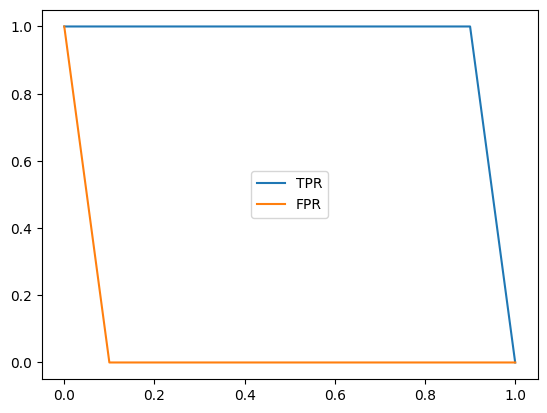

In [83]:
import matplotlib.pyplot as plt # TODO: Add notes explaining why `matplotlib.pyplot` is imported here, if it hasn't been done at the top.
                                #  Hint: Mention it's for creating static, interactive, and animated visualizations.

# Plots the True Positive Rate (TPR) and False Positive Rate (FPR) against different thresholds.
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()
plt.show()
# TODO: Add notes explaining how to interpret this plot, which visually represents the ROC curve.
#  Hint: Discuss the trade-off between TPR and FPR, and how to select an optimal threshold from this plot.